In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

import torch
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import os
import json


outputs/trivia_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.25.json 377
outputs/trivia_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.5.json 377
outputs/trivia_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.75.json 377
outputs/trivia_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_1.0.json 64
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.25.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.5.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.75.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_1.0.json 311
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_2_range(12,32)_0.25.json 139
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/se

IndexError: list index out of range

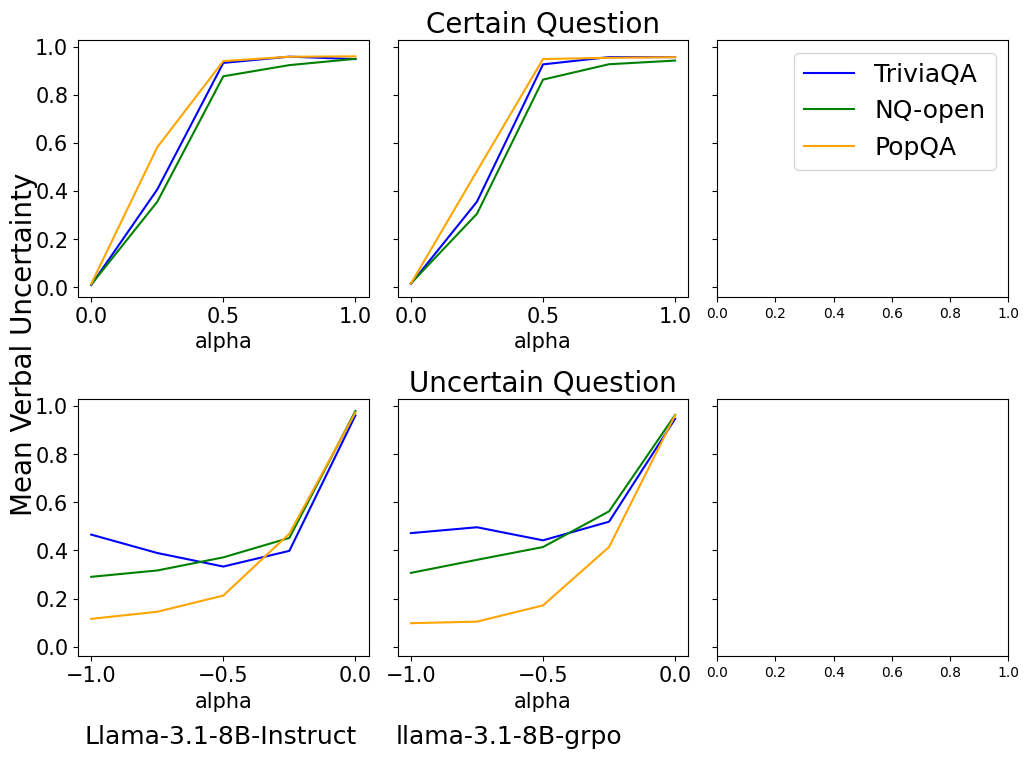

In [11]:
dataset_names = ['trivia_qa', 'nq_open', 'pop_qa']
# model_names = ['Meta-Llama-3.1-8B-Instruct', 'Mistral-7B-Instruct-v0.3', 'Qwen2.5-7B-Instruct']
model_names = ['Meta-Llama-3.1-8B-Instruct', 'llama-3.1-8B-grpo']
prompt_type = 'sentence'
COLORS = {'trivia_qa': 'blue', 'nq_open': 'green', 'pop_qa': 'orange'}
DATASETS = {'trivia_qa': 'TriviaQA', 'nq_open': 'NQ-open', 'pop_qa': 'PopQA'}
iti_method = 2
dataset2 = 'trivia_qa'
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharey=True) # certain uncertain three models
# adjust the space between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for model_i, model_name in enumerate(model_names):
    for i, dataset in enumerate(dataset_names):
        full_dataset = DATASETS[dataset]
        color = COLORS[dataset]
        if iti_method == 1 and dataset == 'trivia_qa':
            continue
        output_dir = f"outputs/{dataset}/{model_name}/{prompt_type}/val"
        if model_name == 'Meta-Llama-3.1-8B-Instruct':
            results_df = pd.read_csv(f"../datasets/{dataset}/sampled/val.csv")
        else:
            results_df = pd.read_csv(f"../datasets/{dataset}/{model_name}/val.csv")
        # data = pd.read_csv(f"../datasets/{dataset}/{model_name}_sentence/val.csv")
        
        lufa_alphas = np.arange(0, 1.25, 0.25).tolist()
        lufa_alphas2 = np.arange(-1, 0.1, 0.25).tolist()
        if 'Llama' in model_name:
            str_process_layers = 'range(12,32)'
        elif 'Qwen' in model_name:
            str_process_layers = 'range(16,28)'
            # lufa_alphas = np.arange(0, 0.2, 0.05).tolist()
            # lufa_alphas2 = np.arange(-0.2, 0.05, 0.05).tolist()
        elif 'Mistral' in model_name:
            str_process_layers = 'range(15,32)'
        elif 'llama' in model_name:
            str_process_layers = 'range(12,32)'
        # assert len(results_df) == len(data)
        # results_df['model_generated'] = data['model_generated']
        lu_scores_llm = results_df['ling_uncertainty'].to_numpy()
        # use threshold
        ling_uncertain_idx = np.array([
            i for i in range(len(results_df))
            if lu_scores_llm[i] >= 0.9
        ])
        ling_certain_idx = np.array([
            i for i in range(len(results_df))
            if  lu_scores_llm[i] <= 0.05
        ])
        certain_lu = np.mean(lu_scores_llm[ling_certain_idx])
        uncertain_lu = np.mean(lu_scores_llm[ling_uncertain_idx])
        

        # certain 
        all_mean_lu, alphas = [], []
        
        for alpha in lufa_alphas:
            alpha = round(alpha, 2)
            if alpha == 0:
                alphas.append(alpha)
                all_mean_lu.append(certain_lu)
                continue
            if iti_method ==2:
                file = f"{output_dir}/questions_certain_lu_{iti_method}_{str_process_layers}_{alpha}.json"
            else:
                file = f"{output_dir}/questions_certain_lu_{iti_method}_{dataset2}_{str_process_layers}_{alpha}.json"
            try:
                all_lus = []
                with open(file) as f:
                    lu = json.load(f)
                    print(file, len(lu))
                for lu_q in lu.values():
                    all_lus.extend(lu_q)
                all_lus = [x for x in all_lus if x != -1]
                mean_lu = np.mean(all_lus)
                all_mean_lu.append(mean_lu)
                alphas.append(alpha)
            except Exception as e:
                print(f"no file {file}", e)
        if model_i == 1:
            ax[0][model_i].set_title('Certain Question', fontsize=20)
        ax[0][model_i].set_xlabel("alpha", fontsize=15)
        ax[0][model_i].plot(alphas, all_mean_lu, label=full_dataset, color=color)
        ax[0][model_i].tick_params(axis='x', labelsize=15)
        ax[0][model_i].tick_params(axis='y', labelsize=15)
        # ax[0][model_i].set_ylabel('Mean Verbal Uncertainty', fontsize=16)
        # ax[0][model_i].legend()

        all_mean_lu, alphas = [], []
        
        for alpha in lufa_alphas2:
            alpha = round(alpha, 2)
            if alpha == 0:
                alphas.append(alpha)
                all_mean_lu.append(uncertain_lu)
                continue    
            if iti_method ==2:
                file = f"{output_dir}/questions_uncertain_lu_{iti_method}_{str_process_layers}_{alpha}.json"
            else:
                file = f"{output_dir}/questions_uncertain_lu_{iti_method}_{dataset2}_{str_process_layers}_{alpha}.json"
            if os.path.exists(file):
                all_lus = []
                with open(file) as f:
                    lu = json.load(f)
                for lu_q in lu.values():
                    all_lus.extend(lu_q)
                mean_lu = np.mean(all_lus)
                all_mean_lu.append(mean_lu)
                alphas.append(alpha)
        if model_i == 1:
            ax[1][model_i].set_title('Uncertain Question', fontsize=20)
        ax[1][model_i].set_xlabel("alpha", fontsize=15)
        ax[1][model_i].plot(alphas, all_mean_lu, label=dataset, color=color)
        ax[1][model_i].tick_params(axis='x', labelsize=15)
        ax[1][model_i].tick_params(axis='y', labelsize=15)
        
        # ax[1][model_i].set_ylabel('Mean Verbal Uncertainty', fontsize=16)
        # ax[1][model_i].legend()
plt.subplots_adjust(hspace=0.4) 
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.9, 0.88), fontsize=18)
# fig.text(0.08, 0.73, 'Mean Verbal Uncertainty', rotation=90, 
#         verticalalignment='center', horizontalalignment='center', fontsize=10)
# save the picture
# fig.text(0.08, 0.26, 'Mean Verbal Uncertainty', rotation=90, 
#         verticalalignment='center', horizontalalignment='center', fontsize=10)
fig.text(0.08, 0.5, 'Mean Verbal Uncertainty', rotation=90, 
        verticalalignment='center', horizontalalignment='center', fontsize=20)

fig.text(0.13,0, model_names[0].replace('Meta-',''), fontsize=18)
fig.text(0.39,0, model_names[1], fontsize=18)
fig.text(0.68,0, model_names[2], fontsize=18)
plt.savefig(f'{output_dir}/{iti_method}_lu_causal.png', dpi=300)


In [ ]:
import pandas as pd
import os
input_path = "/home/ziweiji/Hallu_Det/calibration/outputs/trivia_qa/llama-3.1-8B-grpo/None/val/questions_certain_with_lufi_2_range(15,32)_1.75.jsonl"
print(os.path.exists(input_path))
qa_ds = pd.read_json(input_path, lines=True)

False


ValueError: Expected object or value

max su_scores 2.302585092994045
max su_scores 2.302585092994045
max su_scores 2.302585092994045


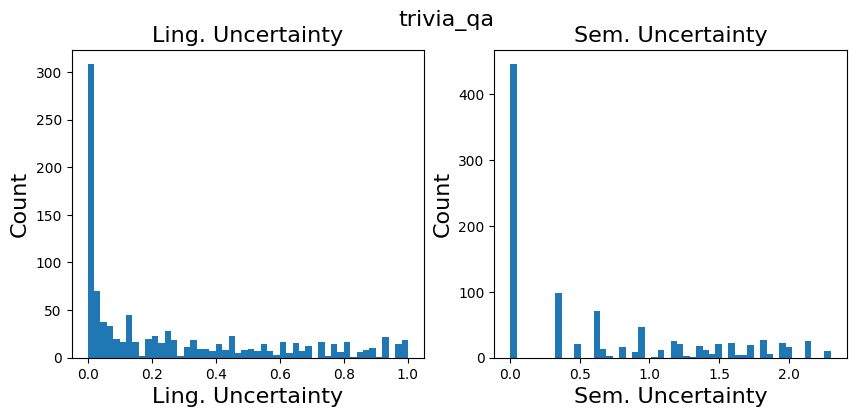

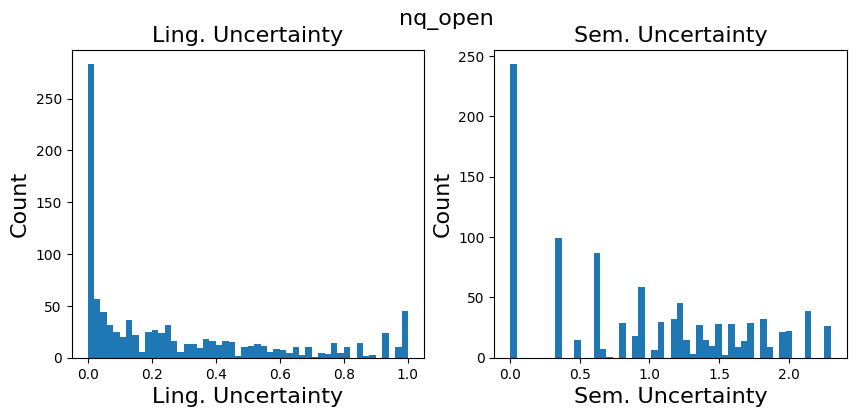

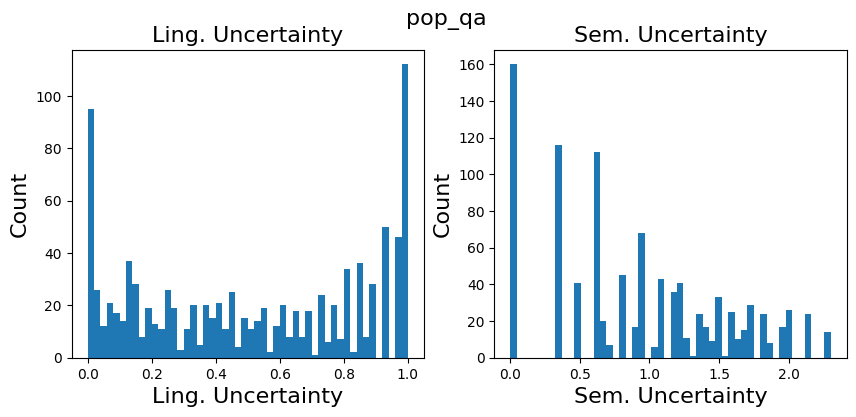

In [ ]:
for i, dataset in enumerate(dataset_names):
    results_df = pd.read_csv(f"../datasets/{dataset}/sampled/test.csv")
    lu_scores_llm = results_df['ling_uncertainty'].to_numpy()
    su_scores = results_df['sentence_semantic_entropy'].to_numpy()

    # plt the distribution of Verbal Uncertainty
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].hist(lu_scores_llm, bins=50)
    ax[0].set_title('Verbal Uncertainty', fontsize=16)
    ax[0].set_xlabel('Verbal Uncertainty', fontsize=16)
    ax[0].set_ylabel('Count', fontsize=16)


    ax[1].hist(su_scores, bins=50)
    ax[1].set_title('Sem. Uncertainty', fontsize=16)
    ax[1].set_xlabel('Sem. Uncertainty', fontsize=16)
    ax[1].set_ylabel('Count', fontsize=16)
    print('max su_scores', np.max(su_scores))

    plt.suptitle(dataset, fontsize=16)


In [ ]:
import pickle
import os
for datset in ['trivia_qa', 'nq_open', 'pop_qa']:
    print(datset)
    for alpha in [1.0, 2.0]:
        input = f"./outputs/{datset}/test/uncertainty_measures_2_range(15,32)_{alpha}.pkl"
        if os.path.exists(input):
            with open(input, "rb") as f:
                uncertainty_measures = pickle.load(f)
                print(len(uncertainty_measures['uncertainty_measures']['cluster_assignment_entropy']))
        else:
            print(f"no file {input}")

trivia_qa
1000
894
nq_open
441
no file /home/ziweiji/Hallu_Det/calibration/outputs/nq_open/test/uncertainty_measures_2_range(15,32)_2.0.pkl
pop_qa
1000
no file /home/ziweiji/Hallu_Det/calibration/outputs/pop_qa/test/uncertainty_measures_2_range(15,32)_2.0.pkl
